In [ ]:
import re
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from collections import Counter

home = os.path.expanduser("~")
data_dir = os.path.join(home, 'Documents/semantic-robot/testing/results')

### Extract necessary data

In [ ]:
def extract_data(filename):
    with open(filename) as f:
        content = f.read()
    
    prompt = re.findall(r'Prompt number\s+:\s+(.+)', content)
    test_sets = re.findall(r'Test set #\s+:\s+(.+)', content)
    number_of_examples = re.findall(r'Number of examples\s+:\s+(.+)', content)
    inference_times = re.findall(r'Inference time \[s\]\s+:\s+(.+)', content)
    memory_usage = re.findall(r'GPU memory loaded \[MB\]\s+:\s+(.+)', content)
    input_size = re.findall(r'Model input size \[MB\]\s+:\s+(.+)', content)
    model = re.findall(r'Model\s+:\s+(.+)', content)
    sliced_output = re.findall(r'Sliced output\s+:\s+(.+)', content)
    solution = re.findall(r'Solution\s+:\s+(.+)', content)
    labeled = re.findall(r'Labeled\s+:\s+(.+)', content)
    knowledge = re.findall(r'Generated knowledge\s+:\s+(.+)', content)

    return {
        'model': list(map(str, model)),
        'prompt': list(map(int, prompt)),
        'test_set': list(map(int, test_sets)),
        'num_examples': list(map(int, number_of_examples)),
        'sliced_output': list(map(str, sliced_output)),
        'solution': list(map(str, solution)),
        'inference_time': list(map(float, inference_times)),
        'memory_usage': list(map(float, memory_usage)),
        'input_size': list(map(float, input_size)),
        'labeled': list(map(str, labeled)),
        'knowledge': list(map(str, knowledge))
    }

In [ ]:
data = extract_data(os.path.join(data_dir, 'mistral_test_results_specific.txt'))

df = pd.DataFrame(data)

In [ ]:
knowledge_df = df.loc[df['knowledge'] == 'Yes']
no_knowledge_df = df.loc[df['knowledge'] == 'No']

# split knowledge_df and no_knowledge_df by prompt number 1-3
knowledge_df_1 = knowledge_df.loc[knowledge_df['prompt'] == 1]
knowledge_df_2 = knowledge_df.loc[knowledge_df['prompt'] == 2]
knowledge_df_3 = knowledge_df.loc[knowledge_df['prompt'] == 3]

no_knowledge_df_1 = no_knowledge_df.loc[no_knowledge_df['prompt'] == 1]
no_knowledge_df_2 = no_knowledge_df.loc[no_knowledge_df['prompt'] == 2]
no_knowledge_df_3 = no_knowledge_df.loc[no_knowledge_df['prompt'] == 3]

# create outputs which is a list of 10 lists
outputs = [[] for i in range(10)]

for i in range(len(outputs)):
    outputs[i].append(knowledge_df_1['sliced_output'].iloc[i])
    outputs[i].append(knowledge_df_2['sliced_output'].iloc[i])
    outputs[i].append(knowledge_df_3['sliced_output'].iloc[i])
    outputs[i].append(no_knowledge_df_1['sliced_output'].iloc[i])
    outputs[i].append(no_knowledge_df_2['sliced_output'].iloc[i])
    outputs[i].append(no_knowledge_df_3['sliced_output'].iloc[i])

dfs = [knowledge_df_1, knowledge_df_2, knowledge_df_3, no_knowledge_df_1, no_knowledge_df_2, no_knowledge_df_3]

#### Inference time

In [ ]:
# create a plot with the dfs[i]['inference_time']
fig, ax = plt.subplots()
for i in range(len(dfs)):
    if i < 3:
        ax.plot(dfs[i]['num_examples'], dfs[i]['inference_time'], label=f'Prompt {i+1} knowledge')
    else:
        ax.plot(dfs[i]['num_examples'], dfs[i]['inference_time'], label=f'Prompt {i-2} no knowledge')

ax.set_xlabel('Number of examples')
ax.set_ylabel('Inference time [s]')
ax.set_title('Inference time for different prompts and knowledge')
ax.legend()
ax.grid()
plt.show()

# compute the average inference_time for each prompt and knowledge and make a bar plot
inference_times = []

for i in range(len(dfs)):
    inference_times.append(dfs[i]['inference_time'].mean())

# create a grouped bar plot with the inference times, where the pairs are dfs[0] and dfs[3], dfs[1] and dfs[4], dfs[2] and dfs[5]
barWidth = 0.25
r1 = np.arange(len(inference_times)//2)  # change here
r2 = [x + barWidth for x in r1]

plt.bar(r1, inference_times[:3], width=barWidth, label='Knowledge')
plt.bar(r2, inference_times[3:6], width=barWidth, label='No knowledge')  # change here

plt.xlabel('Prompt')
plt.ylabel('Inference time [s]')
plt.title('Average inference time for different prompts and knowledge')
plt.xticks([r + barWidth/2 for r in range(len(inference_times[:3]))], ['1', '2', '3'])
plt.legend()
plt.savefig('avg_inf_time_specific.pdf', format='pdf')
plt.show()


# Mistral output plots

In [ ]:
solution_instances = np.array([
    {'pallet_1': 'pallet'},
    {},
    {'pallet_1': 'pallet', 'pallet_2': 'pallet'},
    {'pallet_1': 'pallet', 'pallet_2': 'pallet'},
    {'pallet_1': 'pallet', 'pallet_2': 'pallet', 'pallet_3': 'pallet', 'pallet_4': 'pallet', 'pallet_5': 'pallet', 'pallet_6': 'pallet'},
    {'pallet_1': 'pallet', 'pallet_2': 'pallet', 'pallet_3': 'pallet', 'pallet_4': 'pallet', 'pallet_5': 'pallet', 'pallet_6': 'pallet', 'pallet_7': 'pallet', 'pallet_8': 'pallet', 'pallet_9': 'pallet', 'pallet_10': 'pallet'},
    {'pallet_1': 'pallet', 'pallet_2': 'pallet'},
    {'pallet_1': 'pallet', 'pallet_2': 'pallet'},
    {'pallet_11': 'pallet'},
    {'pallet_1': 'pallet', 'pallet_2': 'pallet', 'pallet_3': 'pallet', 'pallet_4': 'pallet'},
    {'pallet_13': 'pallet'},
])

solution_predicates = np.array([
    {'pallet_1 unload_zone': 'pallet_at', 'pallet_1': 'pallet_not_moved'},
    {},
    {'pallet_1 unload_zone': 'pallet_at', 'pallet_1': 'pallet_not_moved', 'pallet_2 unload_zone': 'pallet_at', 'pallet_2': 'pallet_not_moved'},
    {'pallet_1 unload_zone': 'pallet_at', 'pallet_1': 'pallet_not_moved', 'pallet_2 unload_zone': 'pallet_at', 'pallet_2': 'pallet_not_moved'},
    {'pallet_1 unload_zone': 'pallet_at', 'pallet_1': 'pallet_not_moved', 'pallet_2 unload_zone': 'pallet_at', 'pallet_2': 'pallet_not_moved', 'pallet_3 unload_zone': 'pallet_at', 'pallet_3': 'pallet_not_moved', 'pallet_4 unload_zone': 'pallet_at', 'pallet_4': 'pallet_not_moved', 'pallet_5 unload_zone': 'pallet_at', 'pallet_5': 'pallet_not_moved', 'pallet_6 unload_zone': 'pallet_at', 'pallet_6': 'pallet_not_moved'},
    {'pallet_1 unload_zone': 'pallet_at', 'pallet_1': 'pallet_not_moved', 'pallet_2 unload_zone': 'pallet_at', 'pallet_2': 'pallet_not_moved', 'pallet_3 unload_zone': 'pallet_at', 'pallet_3': 'pallet_not_moved', 'pallet_4 unload_zone': 'pallet_at', 'pallet_4': 'pallet_not_moved', 'pallet_5 unload_zone': 'pallet_at', 'pallet_5': 'pallet_not_moved', 'pallet_6 unload_zone': 'pallet_at', 'pallet_6': 'pallet_not_moved', 'pallet_7 unload_zone': 'pallet_at', 'pallet_7': 'pallet_not_moved', 'pallet_8 unload_zone': 'pallet_at', 'pallet_8': 'pallet_not_moved', 'pallet_9 unload_zone': 'pallet_at', 'pallet_9': 'pallet_not_moved', 'pallet_10 unload_zone': 'pallet_at', 'pallet_10': 'pallet_not_moved'},
    {'pallet_1 unload_zone': 'pallet_at', 'pallet_1': 'pallet_not_moved', 'pallet_2 unload_zone': 'pallet_at', 'pallet_2': 'pallet_not_moved'},
    {'pallet_1 unload_zone': 'pallet_at', 'pallet_1': 'pallet_not_moved', 'pallet_2 unload_zone': 'pallet_at', 'pallet_2': 'pallet_not_moved'},
    {'pallet_11 unload_zone': 'pallet_at', 'pallet_11': 'pallet_not_moved'},
    {'pallet_1 unload_zone': 'pallet_at', 'pallet_2 unload_zone': 'pallet_at', 'pallet_3 unload_zone': 'pallet_at', 'pallet_4 unload_zone': 'pallet_at', 'pallet_1': 'pallet_not_moved', 'pallet_2': 'pallet_not_moved', 'pallet_3': 'pallet_not_moved', 'pallet_4': 'pallet_not_moved'},
    {'pallet_13 unload_zone': 'pallet_at', 'pallet_13': 'pallet_not_moved'}
])

solution_goals = np.array([
    {'pallet_1 shelf_4': 'pallet_at'},
    {'tars shelf_2': 'robot_at'},
    {'pallet_1 shelf_2': 'pallet_at', 'pallet_2 shelf_4': 'pallet_at'},
    {'pallet_1 shelf_2': 'pallet_at', 'pallet_2 shelf_3': 'pallet_at'},
    {'pallet_1 shelf_1': 'pallet_at', 'pallet_2 shelf_1': 'pallet_at', 'pallet_3 shelf_1': 'pallet_at', 'pallet_4 shelf_2': 'pallet_at', 'pallet_5 shelf_3': 'pallet_at', 'pallet_6 shelf_4': 'pallet_at'},
    {'pallet_1 shelf_3': 'pallet_at', 'pallet_2 shelf_4': 'pallet_at', 'pallet_3 shelf_2': 'pallet_at', 'pallet_4 shelf_3': 'pallet_at', 'pallet_5 shelf_3': 'pallet_at', 'pallet_6 shelf_1': 'pallet_at', 'pallet_7 shelf_4': 'pallet_at', 'pallet_8 shelf_1': 'pallet_at', 'pallet_9 shelf_1': 'pallet_at', 'pallet_10 shelf_2': 'pallet_at'},
    {'pallet_1 shelf_1': 'pallet_at', 'pallet_2 shelf_2': 'pallet_at', 'tars shelf_4': 'robot_at'},
    {'pallet_1 shelf_4': 'pallet_at', 'pallet_2 shelf_2': 'pallet_at', 'tars charging_station': 'robot_at'},
    {'pallet_11 shelf_1': 'pallet_at', 'tars shelf_2': 'robot_at'},
    {'pallet_1 shelf_3': 'pallet_at', 'pallet_2 shelf_3': 'pallet_at', 'pallet_3 shelf_3': 'pallet_at', 'pallet_4 shelf_3': 'pallet_at'},
    {'pallet_13 shelf_2': 'pallet_at ', 'tars shelf_1': 'robot_at'}
])

In [ ]:
# for all the strings in outputs, make all chars lowercase and remove all special character '\', '#', ':', ''', '"'
for i in range(len(outputs)):
    for j in range(len(outputs[i])):
        outputs[i][j] = outputs[i][j].lower()
        outputs[i][j] = outputs[i][j].replace('\\', '')
        outputs[i][j] = outputs[i][j].replace('#', '')
        outputs[i][j] = outputs[i][j].replace(':', '')
        outputs[i][j] = outputs[i][j].replace('\'', '')
        outputs[i][j] = outputs[i][j].replace('"', '')

# print the sublists in outputs to a file
with open('outputs_specific.txt', 'w') as f:
    for i in range(len(outputs)):
        f.write(f'Test {i+1}\n')
        for j in range(len(outputs[i])):
            f.write(f'Prompt {j+1}: {outputs[i][j]}\n')
        f.write('\n')

out_instances_dicts= [[] for _ in range(len(outputs))]
out_predicates_dicts = [[] for _ in range(len(outputs))]
out_goals_dicts = [[] for _ in range(len(outputs))]

counter = 1

for i in range(len(outputs)):
    for j in range(len(outputs[i])):
        instances = outputs[i][j].split('predicate')[0]
        predicates = outputs[i][j].split('goal ')[0].replace(instances, '')
        goals = outputs[i][j].replace(instances + predicates, '')

        instances = instances.replace("|", " |")
        predicates = predicates.replace("|", " |")
        goals = goals.replace("|", " |")

        instances = instances.split()
        predicates = predicates.split()
        goals = goals.split()     

        for k in range(len(instances)):
            instances[k] = instances[k].replace("|", "")
        for k in range(len(predicates)):
            predicates[k] = predicates[k].replace("|", "")
        for k in range(len(goals)):
            goals[k] = goals[k].replace("|", "")

        instances = list(filter(None, instances))
        predicates = list(filter(None, predicates))
        goals = list(filter(None, goals))


        instances_dict = {}
        key = None
        for word in instances:
            if word == 'instance':
                if key is not None:
                    if key in instances_dict:
                        # print(f'Key {key} already exists in instances {counter}.')
                        key = key+'_copy'
                        instances_dict[key] = value
                    else:
                        instances_dict[key] = value
                key = None
                value = None
            elif key is None:
                key = word
            else:
                value = word
        if key is not None:
            if key in instances_dict:
                # print(f'Key {key} already exists in instances {counter}.')
                key = key+'_copy'
                instances_dict[key] = value
            else:    
                instances_dict[key] = value

        # create predicates dictionary
        predicates_dict = {}
        key = ''
        value = ''
        for n in range(len(predicates)):
            if predicates[n] == 'predicate':
                if key:
                    if key in predicates_dict:
                        # print(f"Key {key} already exists in predicates {counter}.")
                        key = key+'_copy'
                        predicates_dict[key] = value
                    else:
                        predicates_dict[key] = value

                value = predicates[n+1] 
                key = ' '.join(predicates[n+2:])  
                next_predicate_index = key.find('predicate') 
                if next_predicate_index != -1:
                    key = key[:next_predicate_index].strip()
        if key:
            if key in predicates_dict:
                # print(f"Key {key} already exists in predicates {counter}.")
                key = key+'_copy'
                predicates_dict[key] = value
            else:
                predicates_dict[key] = value

        # create goals dictionary
        goals_dict = {}
        key = ''
        value = ''
        for n in range(len(goals)):
            if goals[n] == 'goal':
                if key:
                    if key in goals_dict:
                        # print(f"Key {key} already exists in goals {counter}.")
                        key = key+'_copy'
                        goals_dict[key] = value
                    else:
                        goals_dict[key] = value

                value = goals[n+1] 
                key = ' '.join(goals[n+2:])  
                next_goal_index = key.find('goal') 
                if next_goal_index != -1:
                    key = key[:next_goal_index].strip()
        if key:
            if key in goals_dict:
                # print(f"Key {key} already exists in goals {counter}.")
                key = key+'_copy'
                goals_dict[key] = value
            else:
                goals_dict[key] = value

        out_instances_dicts[i].append(instances_dict)
        out_predicates_dicts[i].append(predicates_dict)
        out_goals_dicts[i].append(goals_dict)

instances = np.array(out_instances_dicts)
predicates = np.array(out_predicates_dicts)
goals = np.array(out_goals_dicts)

#### TP: øker for hver riktige instances i predikering
#### FP: øker om det er en type som ikke skal være der eller om det er flere av en type i prediksjon
#### FN: øker om typen ikke er i predikering eller om det er for få
#### TN: teller ikke

In [ ]:
def compare_all_instance_dicts(insts, sol_insts):
    TP = FP = FN = TN = 0

    for i, sublist in enumerate(insts):
        solution_dict = sol_insts[i]
        solution_counter = Counter(solution_dict.values())

        for output_dict in sublist:
            output_counter = Counter(output_dict.values())

            for type, solution_count in solution_counter.items():
                output_count = output_counter.get(type, 0)
                if output_count == solution_count:
                    TP += output_count
                elif output_count < solution_count:
                    TP += output_count
                    FN += solution_count - output_count
                else:  # output_count > solution_count
                    TP += solution_count
                    FP += output_count - solution_count

            for type, output_count in output_counter.items():
                if type not in solution_counter:
                    FP += output_count

    return TP, FP, FN, TN

def compare_instance_dicts(insts, sol_insts):
    results = []

    for i, sublist in enumerate(insts):
        solution_dict = sol_insts[i]
        solution_counter = Counter(solution_dict.values())
        sublist_results = []

        for output_dict in sublist:
            TP = FP = FN = TN = 0
            output_counter = Counter(output_dict.values())

            for type, solution_count in solution_counter.items():
                output_count = output_counter.get(type, 0)
                if output_count == solution_count:
                    TP += output_count
                elif output_count < solution_count:
                    TP += output_count
                    FN += solution_count - output_count
                else:  # output_count > solution_count
                    TP += solution_count
                    FP += output_count - solution_count

            for type, output_count in output_counter.items():
                if type not in solution_counter:
                    FP += output_count

            sublist_results.append((TP, FP, FN, TN))

        results.append(np.array(sublist_results))

    return np.array(results)

def compare_all_predicates_dicts(preds, sol_preds):
    TP = FP = FN = TN = 0

    for i, sublist in enumerate(preds):
        solution_dict = sol_preds[i]

        for output_dict in sublist:
            for output_key, output_value in output_dict.items():
                for solution_key, solution_value in solution_dict.items():
                    if output_value == solution_value and output_key.count(' ') == solution_key.count(' '):
                        TP += 1
                    elif output_value == solution_value and output_key.count(' ') != solution_key.count(' '):
                        FP += 1

            # Count extra predicates in output as FP
            if len(output_dict) > len(solution_dict):
                FP += len(output_dict) - len(solution_dict)

            # Count missing predicates in output as FN
            if len(output_dict) < len(solution_dict):
                FN += len(solution_dict) - len(output_dict)

    return TP, FP, FN, TN

def compare_predicates_dicts(preds, sol_preds):
    results = []

    for i, sublist in enumerate(preds):
        solution_dict = sol_preds[i]

        for output_dict in sublist:
            TP = FP = FN = TN = 0

            for output_key, output_value in output_dict.items():
                for solution_key, solution_value in solution_dict.items():
                    if output_value == solution_value and output_key.count(' ') == solution_key.count(' '):
                        TP += 1
                    elif output_value == solution_value and output_key.count(' ') != solution_key.count(' '):
                        FP += 1

            for solution_value in solution_dict.values():
                if solution_value not in output_dict.values():
                    FN += 1

            results.append((TP, FP, FN, TN))

    results = np.array(results)
    results_split = np.array_split(results, 10)

    return results_split

def compare_all_goal_dicts(goals, sol_goals):
    TP = FP = FN = TN = 0

    for i, sublist in enumerate(goals):
        solution_dict = sol_goals[i]

        for output_dict in sublist:
            for output_key, output_value in output_dict.items():
                for solution_key, solution_value in solution_dict.items():
                    if output_value == solution_value and output_key.count(' ') == solution_key.count(' '):
                        TP += 1
                    elif output_value == solution_value and output_key.count(' ') != solution_key.count(' '):
                        FP += 1

            # Count extra predicates in output as FP
            if len(output_dict) > len(solution_dict):
                FP += len(output_dict) - len(solution_dict)

            # Count missing predicates in output as FN
            if len(output_dict) < len(solution_dict):
                FN += len(solution_dict) - len(output_dict)

    return TP, FP, FN, TN

def compare_goal_dicts(goals, sol_goals):
    results = []

    for i, sublist in enumerate(goals):
        solution_dict = sol_goals[i]

        for output_dict in sublist:
            TP = FP = FN = TN = 0

            for output_key, output_value in output_dict.items():
                for solution_key, solution_value in solution_dict.items():
                    if output_value == solution_value and output_key.count(' ') == solution_key.count(' '):
                        TP += 1
                    elif output_value == solution_value and output_key.count(' ') != solution_key.count(' '):
                        FP += 1

            for solution_value in solution_dict.values():
                if solution_value not in output_dict.values():
                    FN += 1

            results.append((TP, FP, FN, TN))

    results = np.array(results)
    results_split = np.array_split(results, 10)

    return results_split

In [ ]:
all_instances = compare_all_instance_dicts(instances, solution_instances)
instances = compare_instance_dicts(instances, solution_instances)
all_predicates = compare_all_predicates_dicts(predicates, solution_predicates)
predicates = compare_predicates_dicts(predicates, solution_predicates)
all_goals = compare_all_goal_dicts(goals, solution_goals)
goals = compare_goal_dicts(goals, solution_goals)

# Average [TP, FP, FN, TN] per shot
inst_avg = np.mean(instances, axis=0)
pred_avg = np.mean(predicates, axis=0)
goal_avg = np.mean(goals, axis=0)
total_avg = np.mean([inst_avg, pred_avg, goal_avg], axis=0)

#### F1-score, precision and recall

In [139]:
def metrics(data, prompt: int):
    '''
    Compute precision, recall, f1 and accuracy for each shot.
    '''
    epsilon = 1e-7

    precision, recall, f1 = [], [], []

    for i in range(len(data)):
        TP = data[i][prompt][0]
        FP = data[i][prompt][1]
        FN = data[i][prompt][2]

        precision_i = TP/(TP + FP + epsilon)
        recall_i = TP/(TP + FN + epsilon)
        f1_i = 2 * (precision_i * recall_i) / (precision_i + recall_i + epsilon)

        precision.append(precision_i)
        recall.append(recall_i)
        f1.append(f1_i)
        
    return precision, recall, f1

'''
Resulting array will have the following structure:

instance_precision = np.array([prompt_1], # knowledge
                              [prompt_2], # knowledge
                              [prompt_3], # knowledge
                              [prompt_4], # no knowledge
                              [prompt_5], # no knowledge
                              [prompt_6]) # no knowledge

where prompt_x = [test_1, test_2, test_3, test_4, test_5, test_6, test_7, test_8, test_9, test_10]

instance_precision.shape = (6, 10)
'''
instance_precision_list, instance_recall_list, instance_f1_list = [], [], []
pred_precision_list, pred_recall_list, pred_f1_list = [], [], []
goal_precision_list, goal_recall_list, goal_f1_list = [], [], []

for i in range(len(instances[0])):
    inst_precision, inst_recall, inst_f1 = metrics(instances, i)
    pred_precision, pred_recall, pred_f1 = metrics(predicates, i)
    goal_precision, goal_recall, goal_f1 = metrics(goals, i)

    instance_precision_list.append(inst_precision)
    instance_recall_list.append(inst_recall)
    instance_f1_list.append(inst_f1)

    pred_precision_list.append(pred_precision)
    pred_recall_list.append(pred_recall)
    pred_f1_list.append(pred_f1)

    goal_precision_list.append(goal_precision)
    goal_recall_list.append(goal_recall)
    goal_f1_list.append(goal_f1)

precision_list, recall_list, f1_list = [], [], []

for i in range(len(instances[0])):
    for j in range(len(instances[i])):
        precision = (instance_precision_list[i][j] + pred_precision_list[i][j] + goal_precision_list[i][j]) / 3
        precision_list.append(precision)

In [141]:
print(precision_list)

t = (instance_precision_list[0][5] + pred_precision_list[0][5] + goal_precision_list[0][5]) / 3
print(t)

[0.0, 0.0, 0.6666666250000035, 0.6666666250000035, 0.6999999638333367, 0.8888888531481515, 0.0, 0.0, 0.8333332875000036, 0.6666666250000035, 0.49999998888888936, 0.9999999808333343, 0.0, 0.0, 0.8333332875000036, 0.6666666250000035, 0.666666630555559, 0.5555555214814848, 0.0, 0.0, 0.6666666250000035, 0.6666666250000035, 0.666666630555559, 0.33333330000000333, 0.0, 0.0, 0.8333332875000036, 0.6666666250000035, 0.666666630555559, 0.6666666558333337, 0.0, 0.0, 0.8333332875000036, 0.6666666250000035, 0.666666630555559, 0.66666663166667]
0.8888888531481515


In [132]:
print('(' + str(len(instance_precision_list)) + ', ' + str(len(instance_precision_list[0])) + ')')
print('(' + str(len(pred_precision_list)) + ', ' + str(len(pred_precision_list[0])) + ')')
print('(' + str(len(goal_precision_list)) + ', ' + str(len(goal_precision_list[0])) + ')')

(6, 10)
(6, 10)
(6, 10)


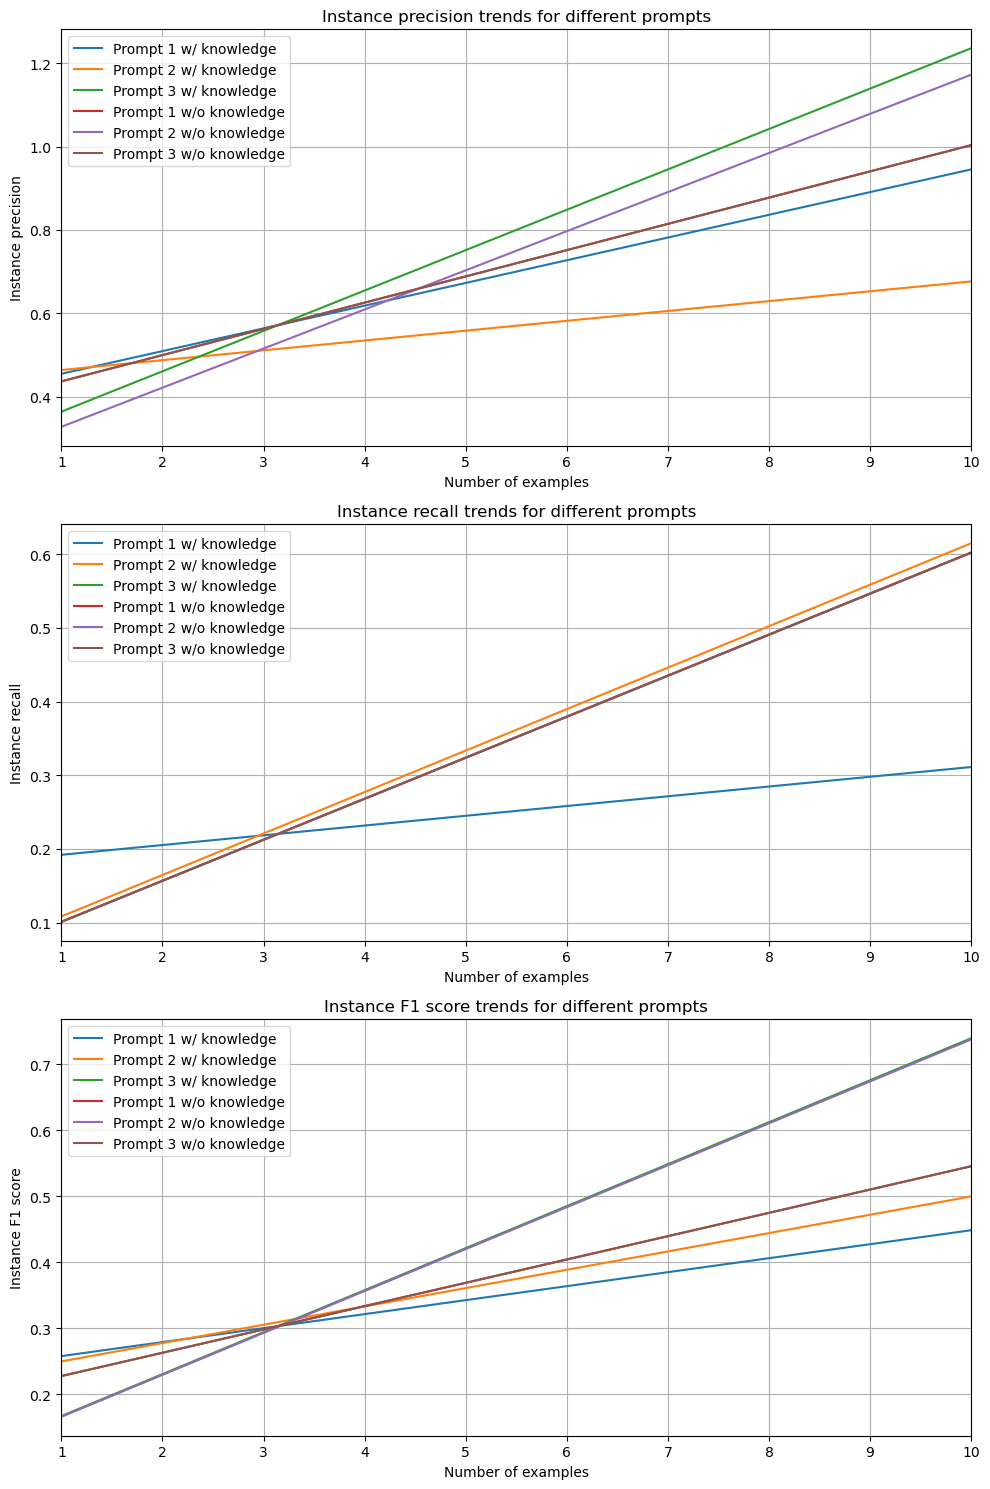

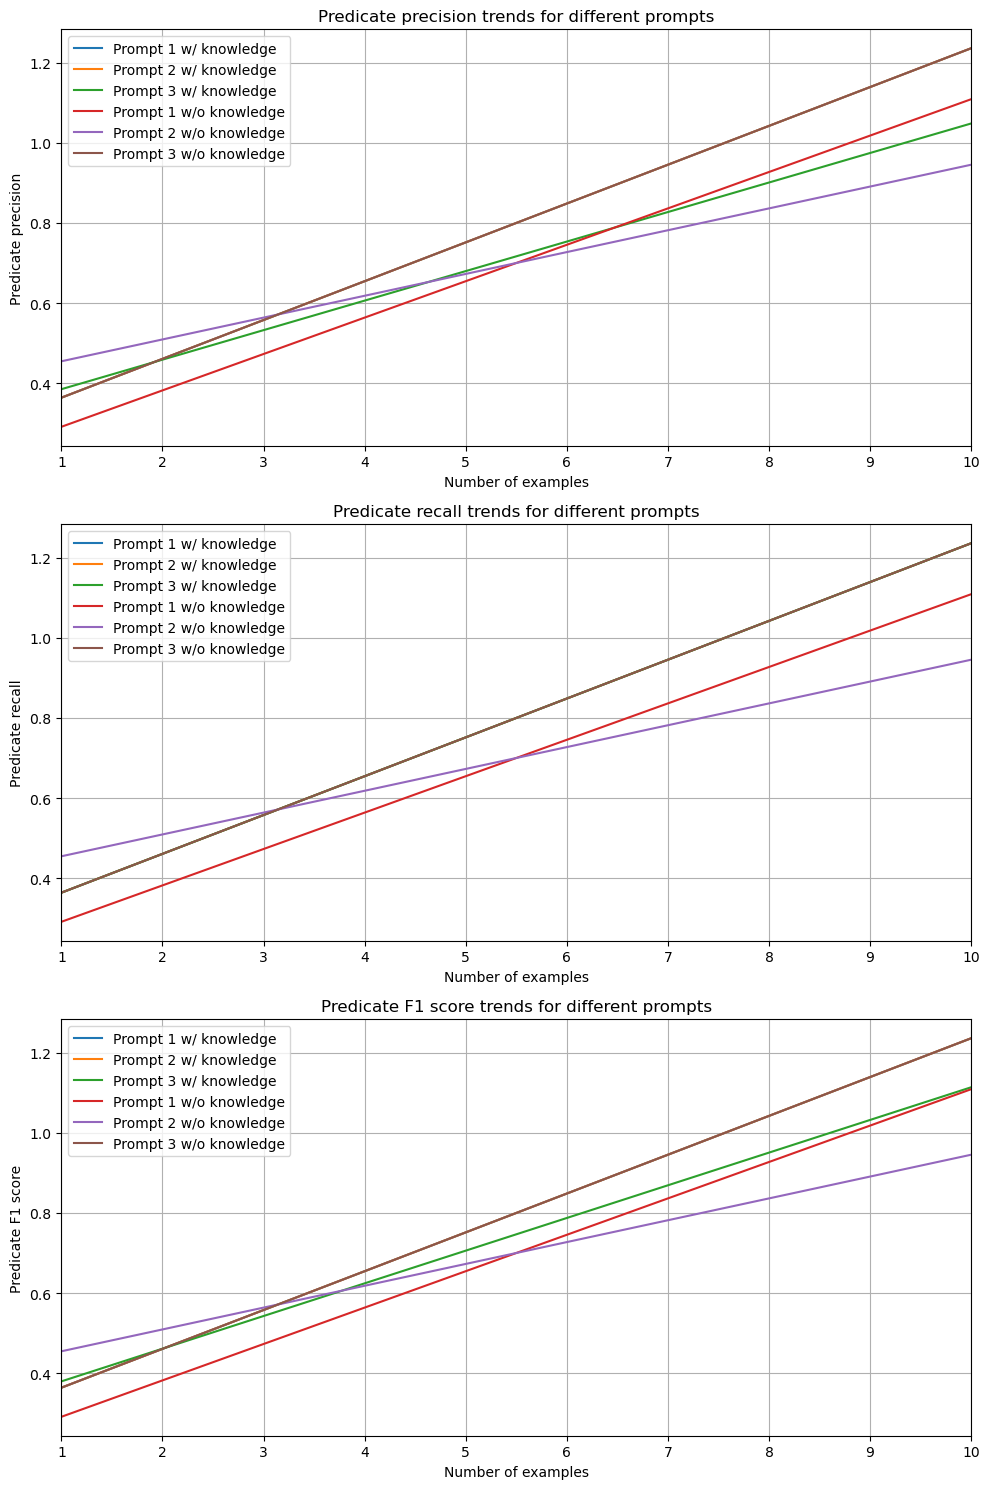

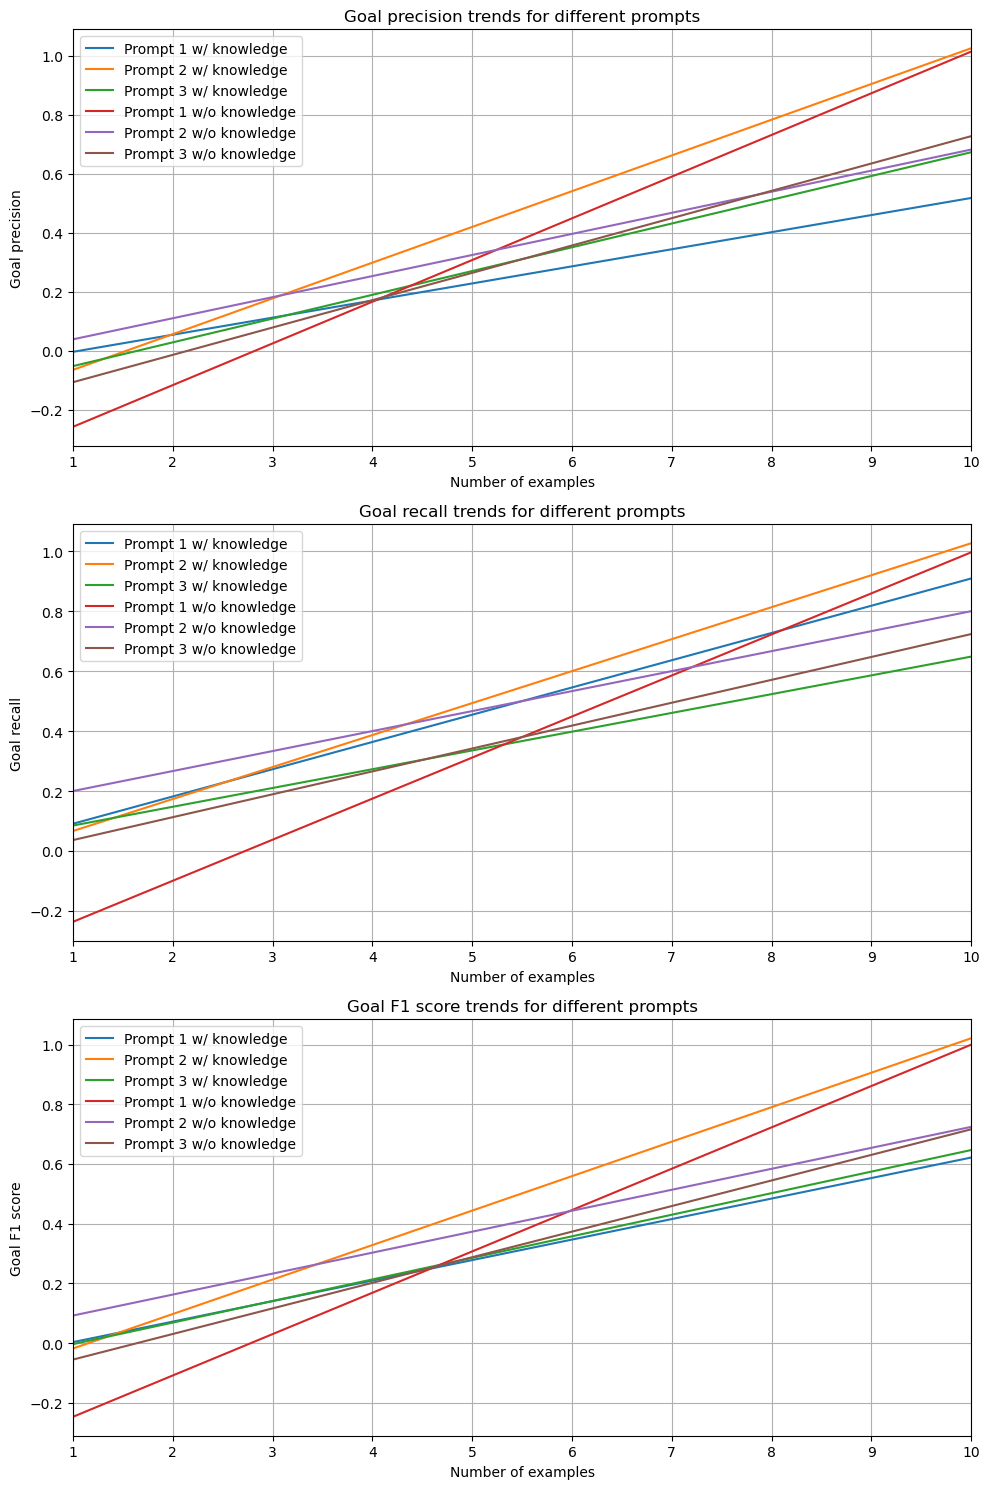

In [125]:
def plot_metrics(precision, recall, f1, atype):
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    metrics = [precision, recall, f1]
    names = [atype + ' precision', atype + ' recall', atype + ' F1 score']
    x = np.array(range(1, 11))

    for j, ax in enumerate(axs):
        for i in range(len(metrics[j])):
            # Fit a line to the data points
            z = np.polyfit(x, metrics[j][i], 1)
            p = np.poly1d(z)
            
            # Plot the trend line
            if i < 3:
                ax.plot(x, p(x), linestyle='-', label=f'Prompt {i+1} w/ knowledge')
            else:
                ax.plot(x, p(x), linestyle='-', label=f'Prompt {i-2} w/o knowledge')

        ax.set_xlabel('Number of examples')
        ax.set_ylabel(names[j])
        ax.set_title(f'{names[j]} trends for different prompts')
        ax.legend()
        ax.grid()
        ax.set_xlim(1, 10)

    plt.tight_layout()
    plt.savefig(atype + '_metrics_trend.pdf', format='pdf')
    plt.show()

# Call the function
plot_metrics(instance_precision_list, instance_recall_list, instance_f1_list, 'Instance')
plot_metrics(pred_precision_list, pred_recall_list, pred_f1_list, 'Predicate')
plot_metrics(goal_precision_list, goal_recall_list, goal_f1_list, 'Goal')

In [ ]:
def grouped_bar_plot_metrics(ax, instance, predicate, goal, total, type):
    bar_width = 0.2
    bar_positions = np.arange(2, 33)

    ax.bar(bar_positions - bar_width, instance, width=bar_width, label='Instances')
    ax.bar(bar_positions, predicate, width=bar_width, label='Predicates')
    ax.bar(bar_positions + bar_width, goal, width=bar_width, label='Goals')

    ax.plot(bar_positions, total, label='Total average', color='black')

    label = ['precision', 'recall', 'F1 score']

    ax.set_xlabel('Number of shots')
    ax.set_ylabel(f'{label[type][0].upper() + label[type][1:]}')
    ax.set_title(f'Average {label[type]} for all test sets vs number of shots')
    ax.legend()

    ax.set_ylim(0, 1)
    ax.set_xlim(1, 33)

    return

fig, axs = plt.subplots(3, 1, figsize=(15, 15)) 

grouped_bar_plot_metrics(axs[0], inst_precision, pred_precision, goal_precision, total_precision, 0)
grouped_bar_plot_metrics(axs[1], inst_recall, pred_recall, goal_recall, total_recall, 1)
grouped_bar_plot_metrics(axs[2], inst_f1, pred_f1, goal_f1, total_f1, 2)

plt.tight_layout()
# plt.savefig('all_metrics.pdf', format='pdf')
plt.show()

In [ ]:
def f1_plot():
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))  # Create 2 subplots

    bar_width = 0.2
    bar_positions = np.arange(2, 33)

    axs[0].bar(bar_positions - bar_width, inst_f1, width=bar_width, label='Instances')
    axs[0].bar(bar_positions, pred_f1, width=bar_width, label='Predicates')
    axs[0].bar(bar_positions + bar_width, goal_f1, width=bar_width, label='Goals')
    axs[0].plot(bar_positions, total_f1, label='Total average', color='black')
    z = np.polyfit(bar_positions, total_f1, 1)
    p = np.poly1d(z)
    axs[0].plot(bar_positions, p(bar_positions), color="black", linestyle='--', label='Trend line (total average)')
    axs[0].set_xlabel('Number of shots')
    axs[0].set_ylabel('F1 score')
    axs[0].set_title('Average F1 score for all test sets vs number of shots (unlabeled shot set)')
    axs[0].legend()
    axs[0].grid()
    axs[0].set_ylim(0, 1)
    axs[0].set_xlim(1, 33)

f1_plot()

In [ ]:
def trend_line_plot(precision, recall, f1, precision_labeled, recall_labeled, f1_labeled):
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))  # Create 2 subplots

    metrics = [precision, recall, f1]
    metrics_labeled = [precision_labeled, recall_labeled, f1_labeled]
    labels = ['Precision', 'Recall', 'F1 Score']

    for ax, metrics, title in zip(axs, [metrics, metrics_labeled], ['unlabeled', 'labeled']):
        for metric, label in zip(metrics, labels):
            # calculate and plot trend line
            z = np.polyfit(np.arange(2, 33), metric, 1)
            p = np.poly1d(z)
            ax.plot(np.arange(2, 33), p(np.arange(2, 33)), label=f'{label} trend line')

        ax.set_xlabel('Number of shots')
        ax.set_ylabel('Metric Value')
        ax.set_title(f'Trend lines for precision, recall and F1 score vs number of shots ({title} shot set)')
        ax.grid()
        ax.legend()

        ax.set_ylim(0, 1)
        ax.set_xlim(2, 32)

    plt.tight_layout()
    # plt.savefig('trend_lines.pdf', format='pdf')
    plt.show()


trend_line_plot(total_precision, total_recall, total_f1, total_precision_labeled, total_recall_labeled, total_f1_labeled)

In [ ]:
# instances, predicates and goals in each sublist respectively
unlabeled = [[
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
            0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 
            1,0, 0, 0, 1,1,1,0, 1, 1, 1, 1, 1, 0,  0,  1, 0,  0,  0,  0,  0,  0,  1, 1, 0,  1, 0,  0,  0,  0,  1,
            1,1,1,1,0, 0, 0, 1,1, 0,  0,  1, 1, 0,  1, 1, 1, 1, 0,  0,  0,  1, 1, 0,  1, 1, 1, 0,  1, 0,  1,
            1,0, 0, 1,0, 0, 0, 0, 0,  0,  1, 1, 1, 0,  0,  1, 0,  0,  0,  0,  1, 0,  0,  1, 1, 1, 1, 0,  0,  1, 1,
            0, 0, 0, 0, 0, 0, 1,0, 1, 0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 
            1,1,0, 1,0, 1,0, 0, 0,  0,  0,  0,  0,  1, 0,  1, 0,  0,  0,  1, 1, 1, 0,  0,  0,  1, 1, 0,  0,  1, 0, 
            1,1,0, 1,0, 0, 0, 1,0,  0,  1, 0,  1, 1, 0,  0,  0,  0,  1, 0,  1, 0,  0,  1, 0,  1, 1, 1, 1, 0,  0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  1, 0,  0, 
            ],
            [    
            0, 0, 0, 1,0, 0, 0, 0, 0,  1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  1, 0, 
            0, 0, 1,0, 0, 0, 1,0, 1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  1, 1, 0,  0,  0,  0,  1, 1, 0,  0, 
            0, 0, 0, 0, 1,1,0, 0, 0,  0,  0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  1, 0,  1, 0,  0,  0,  0,  0,  0, 
            0, 0, 0, 0, 1,0, 1,0, 1, 0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  0, 
            0, 0, 0, 1,0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 1, 0,  0,  0,  0,  0,  0,  0,  0, 
            1,1,1,0, 0, 0, 1,1,0,  1, 0,  0,  0,  1, 0,  0,  1, 0,  1, 1, 0,  1, 0,  0,  0,  0,  0,  1, 0,  1, 0, 
            0, 0, 0, 0, 0, 0, 1,0, 1, 0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 
            0, 0, 0, 1,0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  0, 
            0, 0, 0, 0, 0, 0, 0, 1,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  1, 0,  0, 
            ],
            [
            0, 0, 0, 1,0, 0, 0, 0, 0,  1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  1, 0, 
            0, 0, 0, 0, 0, 0, 1,0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  1, 1, 0,  1, 1, 0,  0, 
            0, 0, 0, 0, 1,0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  1, 0,  0,  0,  0,  0,  0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  0, 
            0, 0, 0, 1,0, 0, 1,0, 1, 0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  0,  1, 1, 0,  0,  0,  0,  0,  0,  0,  0, 
            0, 1,1,0, 1,0, 1,0, 0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 1, 0, 
            0, 0, 0, 0, 0, 0, 1,1,1, 0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 
            0, 0, 0, 1,0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  1, 1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  0, 
            0, 0, 0, 0, 0, 0, 0, 0, 0,  1, 0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  1, 0,  0, 
            ]]

labeled = [[
            0, 1,0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  0,  0,  1, 0,  1, 1, 0,  0,  0, 
            0, 0, 1,1,0, 0, 0, 1,0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  0, 
            0, 0, 0, 0, 1,0, 0, 0, 1, 0,  0,  0,  1, 0,  0,  0,  0,  1, 0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  0,  0,  0, 
            1,0, 0, 1,0, 1,0, 0, 1, 0,  1, 1, 1, 0,  0,  0,  0,  0,  0,  1, 1, 1, 0,  0,  1, 1, 0,  0,  0,  0,  1,
            0, 1,1,1,1,0, 1,0, 1, 0,  0,  1, 1, 1, 0,  0,  1, 0,  0,  0,  1, 1, 1, 1, 1, 0,  1, 0,  1, 1, 0, 
            1,0, 1,0, 0, 1,0, 1,0,  0,  1, 0,  0,  1, 1, 1, 0,  0,  0,  0,  1, 0,  1, 1, 1, 1, 1, 0,  0,  0,  1,
            0, 0, 0, 0, 0, 0, 0, 1,0,  0,  0,  0,  1, 0,  0,  0,  1, 1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  0, 
            1,0, 0, 1,0, 0, 0, 0, 0,  0,  1, 1, 0,  0,  1, 1, 1, 0,  0,  0,  0,  0,  1, 0,  0,  1, 0,  0,  0,  0,  1,
            0, 0, 0, 0, 1,0, 0, 1,1, 0,  0,  0,  1, 0,  0,  0,  0,  1, 1, 0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  1, 0, 
            0, 0, 0, 0, 0, 0, 1,0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  0, 
            ],
            [
            0, 1,0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 0,  0,  0,  0,  1, 0,  1, 1, 0, 0, 0,
            0,0,1,0,0,0,1,1,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0,0,0,0,0,0,0,0,0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0,0,0,1,0,0,0,0,1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
            0,0,0,0,0,0,0,0,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0,1,1,1,0,0,0,0,0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
            0,0,0,0,0,0,0,0,0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0,0,0,1,0,0,0,0,0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0,0,0,0,0,0,1,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
            ],
            [
            0,1,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
            0,0,0,0,0,0,0,1,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0,0,0,0,0,0,0,0,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0,0,0,1,0,0,0,0,1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
            0,0,0,0,0,0,0,1,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0,0,1,1,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
            0,0,0,0,0,0,0,1,0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0,0,0,1,0,0,0,0,0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0,0,0,1,1,0,0,0,0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
            0,0,0,0,0,0,1,0,0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
            ]]

total = [1 if all(sublist[i] == 1 for sublist in unlabeled) else 0 for i in range(len(unlabeled[0]))]
total_labeled = [1 if all(sublist[i] == 1 for sublist in labeled) else 0 for i in range(len(labeled[0]))]

unlabeled_arr = np.array(total)
unlabeled = unlabeled_arr.reshape(10, 31)

labeled_arr = np.array(total_labeled)
labeled = labeled_arr.reshape(10, 31)

In [ ]:
def plot_heatmaps(labeled, unlabeled):
    fig, axs = plt.subplots(ncols=2, figsize=(20, 8))

    # Plot unlabeled heatmap
    ax1 = sns.heatmap(unlabeled, cmap='binary', ax=axs[0], cbar=False)
    ax1.set_yticklabels(range(1, 11))
    ax1.set_xticklabels(range(2, 33))
    ax1.set_title('Correct instances, predicates and goals (unlabeled shot set)')
    ax1.set_ylabel('Test set')
    ax1.set_xlabel('Number of shots')

    # Plot labeled heatmap
    ax2 = sns.heatmap(labeled, cmap='binary', ax=axs[1], cbar=False)
    ax2.set_yticklabels(range(1, 11))
    ax2.set_xticklabels(range(2, 33))
    ax2.set_title('Correct instances, predicates and goals (unlabeled shot set)')
    ax2.set_ylabel('Test set')
    ax2.set_xlabel('Number of shots')

    # fig.suptitle('Heatmaps of test sets with all correct predictions')

    plt.tight_layout()
    plt.show()

    # save to pdf
    # fig.savefig('heatmaps.pdf')

plot_heatmaps(labeled, unlabeled)